In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')

In [7]:
#read my data
dfx = pd.read_csv('xdata.csv')
dfy = pd.read_csv('ydata.csv')

In [10]:
X = dfx.values #x contains all the no.s to be plotted- FIRST COL = INDEX dropping it
Y = dfy.values # y contains the categories i.e 0 or 1
X = X[:,1:]#read all rows and from first column, drop '0' column-index column basically
Y = Y[:,1:].reshape((-1,)) 
print(X.shape)
print(Y.shape)

(399, 2)
(399,)


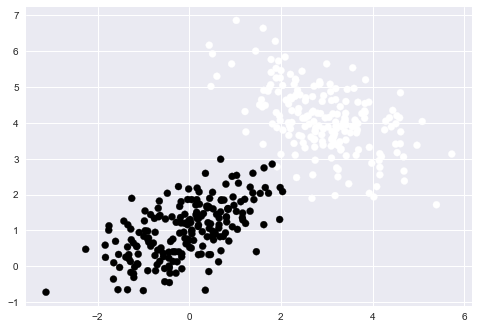

In [12]:
plt.scatter(X[:,0],X[:,1],c=Y) #X contains the data to be plotted
plt.show()

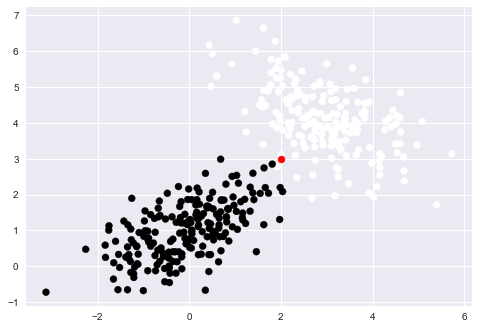

In [13]:
#let's generate query point
query_x = np.array([2,3])#my query point
plt.scatter(X[:,0],X[:,1],c=Y) 
plt.scatter(query_x[0],query_x[1],color='red')#scatter plot the query
plt.show()

In [15]:
#defining euclidian distance
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [19]:
# KNN  
def knn(X,Y,queryPoint,k=5):
    
    vals = [] #store distances, labels - list of tuples
    m = X.shape[0] #total no. of points
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i])) #appending distance, label
        
    
    vals = sorted(vals)#sorting the values based on first parameter
    
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)#turining it into an array
    
    print(vals)

In [20]:
knn(X,Y,query_x) #5 nearest points with their labels is displayed

[[0.11937695 0.        ]
 [0.24392799 1.        ]
 [0.24435617 0.        ]
 [0.32750158 0.        ]
 [0.44941874 1.        ]]


In [21]:
# i have to identify unique labels and count them
def knn(X,Y,queryPoint,k=5):
    
    vals = [] #store distances, labels - list of tuples
    m = X.shape[0] #total no. of points
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i])) #appending distance, label
        
    
    vals = sorted(vals)#sorting the values based on first parameter
    
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)#turining it into an array
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)#counting labels in 1st columns
    #print(new_vals)
    
    index = new_vals[1].argmax()#getting max counts
    pred = new_vals[0][index] #LABEL OF MAX COUNT
    
    return pred

In [22]:
x = knn(X,Y,[0,0])
print(x)

1.0


In [23]:
a=knn(X,Y,[4,7])
print(a)

0.0
